In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [90]:
path = 'startup_funding.csv'

In [91]:
df = pd.read_csv(path)

### Question

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [92]:
test2 = df.copy()

In [93]:
#correcting the spelling in investors name ignoring undisclosed investors
test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [94]:
#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

In [95]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d

In [96]:
dictionary = build_dict(test2['InvestorsName'])

#build pandas dataframe of investors name and its number of investments
invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

In [97]:
#sort the values in descending order 
invest = invest.sort_values(by = [0], ascending = False)

In [98]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i])

In [99]:
#printing the top investors
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1


List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. SAIF Partners
5. Indian Angel Network


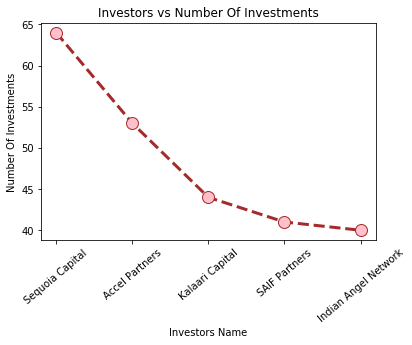

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,[64]
1,Accel Partners,[53]
2,Kalaari Capital,[44]
3,SAIF Partners,[41]
4,Indian Angel Network,[40]


In [100]:
#plot the plot line
plt.plot(x, y, color='brown', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='pink', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()


#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data